In [1]:
# Tema: Comparendos Norte de Santander 2016 - 2020
# Grupo 1: Angie Moreno/202110008171 - Diego Vargas/202110047171 - Luis Ochoa/202519024507
#importamos la librerias para poder trabajar con nuestro DataFrame y poder graficar nuestros graficos de barras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #Nota: Se importa esta libreria para ajustar propiedades de las graficas. Los graficos en si los estamos haciendo con "seaborn"
from matplotlib.ticker import FuncFormatter # al igual que esta, para poder colocar formato en los ejes

In [2]:
# Cargamos el CSV a un DataFrame resultante del proceso "cleaning" (df)
df = pd.read_csv("ComparendosNorteSantanderSource_clean.csv")

In [3]:
# Verificamos la cantidad de columnas y filas de nuestro df, para verificar que se halla cargado correctamente
df.shape

(22121, 6)

In [4]:
#Observamos las columnas disponibles en nuestro df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22121 entries, 0 to 22120
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FECHA              22121 non-null  object 
 1   CODIGO_INFRACCION  22121 non-null  object 
 2   INFRACCION         22121 non-null  object 
 3   LUGAR              22121 non-null  object 
 4   CLASE_VEHICULO     22121 non-null  object 
 5   VALOR              22121 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.0+ MB


<Axes: xlabel='CLASE_VEHICULO', ylabel='Cantidad'>

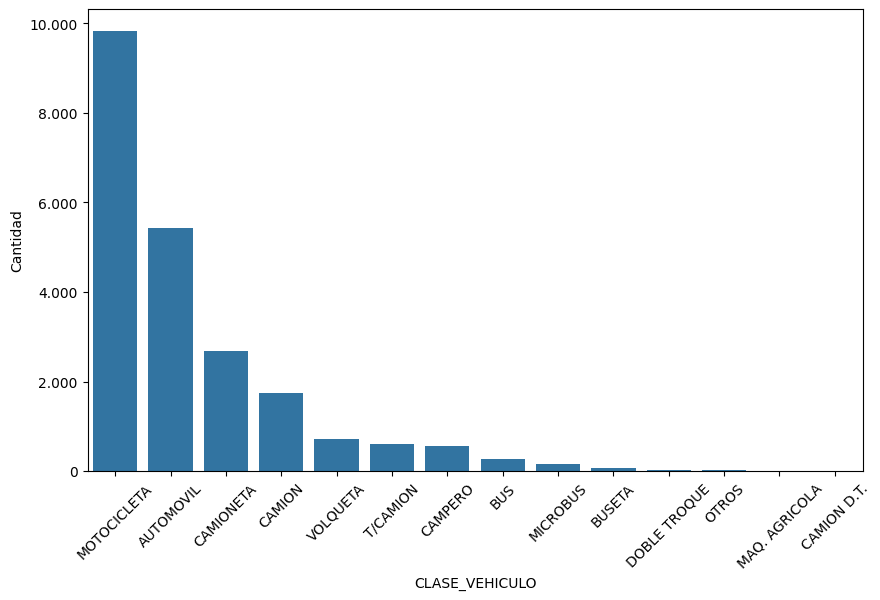

In [5]:
# Obtener la cantidad de registros por CLASE_VEHICULO
df_vehiculos = df['CLASE_VEHICULO'].value_counts().reset_index()
df_vehiculos.columns = ['CLASE_VEHICULO', 'Cantidad']

# Definimos el tamaño de la grafica
plt.figure(figsize=(10, 6))

#Ajustamos la rotacion de los valores en eje X para que no se sobre-monten entre ellos
plt.xticks(rotation=45)  # Rota etiquetas para mejor legibilidad

# Definimos formato para poner "puntos" a los valores
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}'.replace(',', '.'))

# Asignamos el formato configurado al eje Y
plt.gca().yaxis.set_major_formatter(formatter)

# Crear grafico de barras
sns.barplot(data=df_vehiculos, x='CLASE_VEHICULO', y='Cantidad')

#Donde se puede identificar que la mayor cantidad de infracciones son cometidas por Motocicletas y con menor cantidad de infracciones, los vehiculos de transporte de pasajeros


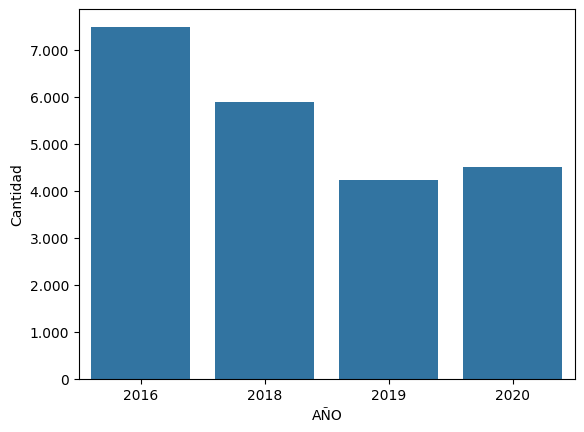

In [6]:
# Extraemos solo el año de la columna FECHA
df['AÑO'] = pd.to_datetime(df['FECHA']).dt.year

# # Obtener la cantidad de registros por año
df_anios = df['AÑO'].value_counts().reset_index()
df_anios.columns = ['AÑO', 'Cantidad']

# Definimos formato para poner "puntos" a los valores
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}'.replace(',', '.'))

# Asignamos el formato configurado al eje Y
plt.gca().yaxis.set_major_formatter(formatter)

# Crear gráfico de barras con Seaborn
grafico = sns.barplot(data=df_anios, x='AÑO', y='Cantidad')

# Se puede indentificar que durante el 2016 se presento el pico mas alto de infracciones y fue disminuyendo hasta 2019. Donde volvio a aumentar en 2020

<Axes: xlabel='CODIGO_INFRACCION', ylabel='Cantidad'>

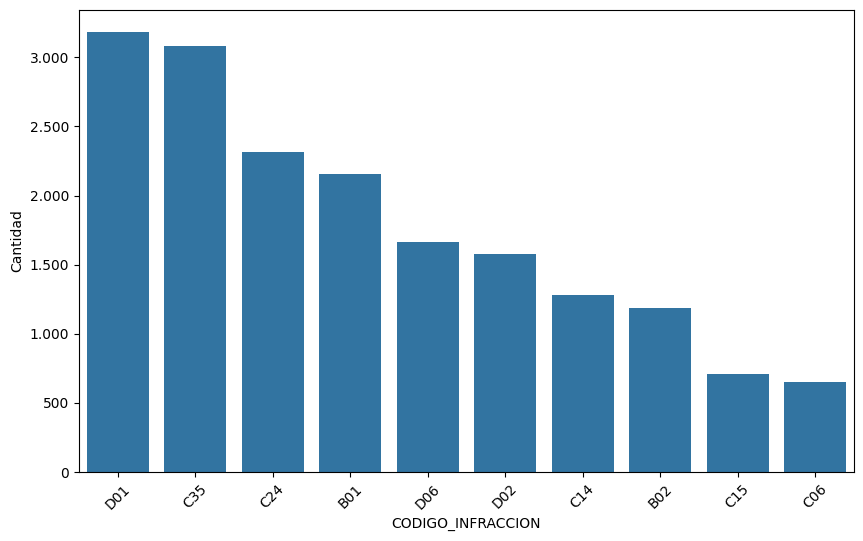

In [7]:
# Obtener la cantidad de registros por CODIGO_INFRACCION
df_vehiculos = df['CODIGO_INFRACCION'].value_counts().head(10).reset_index()
df_vehiculos.columns = ['CODIGO_INFRACCION', 'Cantidad']

# Definimos el tamaño de la grafica
plt.figure(figsize=(10, 6))

#Ajustamos la rotacion de los valores en eje X para que no se sobre-monten entre ellos
plt.xticks(rotation=45)  # Rota etiquetas para mejor legibilidad

# Definimos formato para poner "puntos" a los valores
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}'.replace(',', '.'))

# Asignamos el formato configurado al eje Y
plt.gca().yaxis.set_major_formatter(formatter)

# Crear grafico de barras
sns.barplot(data=df_vehiculos, x='CODIGO_INFRACCION', y='Cantidad')

#Donde se puede identificar que el TOP 10 de las infracciones mas cometidas son: D01 - C35 - C24 - B01 - D06 - D02 - C14 - B02 - C15 - C06 

In [8]:
# Tomamos los codigos de infraccion del TOP 10
codigos_filtrar = ['D01', 'C35', 'C24', 'B01', 'D06', 'D02', 'C14', 'B02', 'C15', 'C06']

# Filtrar el df con los codigos de infraccion
df_filtrado = df[df['CODIGO_INFRACCION'].isin(codigos_filtrar)]

# Agrupar por CODIGO_INFRACCION
df_agrupado = df_filtrado.groupby(['CODIGO_INFRACCION', 'INFRACCION']).size().reset_index

# Mostrar el DataFrame agrupado
print(df_agrupado)

# Teniendo en cuenta esto las dos infracciones mas comunes son; Guiar un vehículo sin haber obtenido la licencia de conducción y
# No realizar la revisión tecnicomecánica

<bound method Series.reset_index of CODIGO_INFRACCION  INFRACCION                                                                                                                                                                                                                                                                   
B01                Conducir un vehículo sin llevar consigo la licencia de conducción                                                                                                                                                                                                                2155
B02                Conducir un vehículo con la licencia de conducción vencida                                                                                                                                                                                                                       1183
C06                No utilizar el cinturón de seguridad por parte de los ocupante